In [228]:
# import warnings
# warnings.filterwarnings("ignore")
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from neuralprophet import NeuralProphet

In [229]:
!pip install seaborn



In [230]:
# cpi=pd.read_csv("inflation-of-consumer-prices.csv")
# cpi.head()

In [231]:
# country="India"
# data=cpi[cpi["Entity"]==country].sort_values("Year")
# cp=data['Inflation, consumer prices (annual %)']
# years = pd.to_datetime(data["Year"], format="%Y")
# cp.head()
# cp.tail()
# plt.plot(years, cp)
# values=pd.DataFrame({"infl":cp,"years":years})
# print(values.iloc[:64])

In [232]:
# df = cpi.loc[cpi["Entity"] == "India", ["Year", "Inflation, consumer prices (annual %)"]].copy()
# df=cpi.rename(columns={'Year':'ds','Inflation, consumer prices (annual %)':'y'})

In [233]:
# df["y"] = pd.to_numeric(df["y"], errors="coerce")
# df.dropna(subset=["y"], inplace=True)
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df.sort_values("ds", inplace=True)
# df.drop_duplicates(subset="ds", keep="last", inplace=True)



In [234]:
# plt.plot(df["ds"],df["y"])

# plt.show()

In [235]:

# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)





In [236]:
# future = m.make_future_dataframe(df, periods=10)
# forecast = m.predict(future)
# forecast


In [237]:
# m.plot(forecast)
# m.plot_components(forecast)


In [238]:
# from neuralprophet import NeuralProphet
# import pandas as pd

# cpi = pd.read_csv("inflation-of-consumer-prices.csv")
# country = "India"
# data = cpi.loc[cpi["Entity"] == country, ["Year", "Inflation, consumer prices (annual %)"]].copy()


# df = data.rename(columns={"Year": "ds", "Inflation, consumer prices (annual %)": "y"})
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df["y"]  = pd.to_numeric(df["y"], errors="coerce")


# df = (df.groupby("ds", as_index=False)["y"].mean()
#         .sort_values("ds")
#         .dropna())




# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)

# # 5) Forecast next 10 years only
# future = m.make_future_dataframe(df, periods=10, n_historic_predictions=False)
# forecast = m.predict(future)

# # 6) Plot
# m.plot(forecast)


In [251]:
import warnings
import numpy as np
from neuralprophet import NeuralProphet
warnings.filterwarnings("ignore")
import pandas as pd
from scipy import linalg
from matplotlib import pyplot as plt
cpi=pd.read_csv("inflation-of-consumer-prices.csv")
cpi.head()

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Australia,AUS,1960,3.728814
1,Austria,AUT,1960,1.945749
2,Belgium,BEL,1960,0.299467
3,Bolivia,BOL,1960,11.533153
4,Burkina Faso,BFA,1960,7.788162


In [250]:
country="European Union (27)"
data=cpi[cpi["Entity"]==country].sort_values("Year")
years=pd.to_datetime(data["Year"], format="%Y")
data.iloc[:,3]


14      1.741181
80      2.077138
147     3.553499
216     2.921641
286     3.416281
          ...   
8715    0.476499
8904    2.554507
9093    8.833699
9281    6.299425
9464    2.435312
Name: Inflation, consumer prices (annual %), Length: 65, dtype: float64

4.474818724615385
3.119992907238304
7.594811631853689


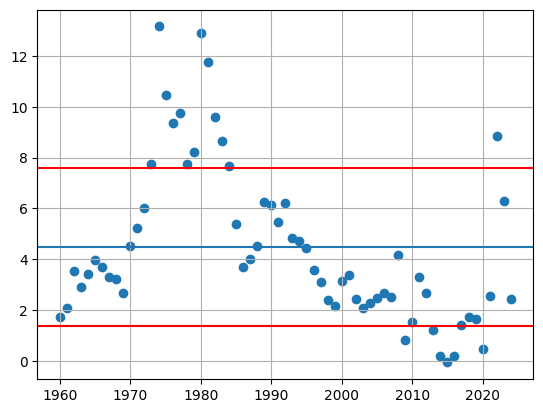

                   Entity Code  Year  Inflation, consumer prices (annual %)
1109  European Union (27)  NaN  1973                               7.749086
1213  European Union (27)  NaN  1974                              13.163603
1319  European Union (27)  NaN  1975                              10.467573
1428  European Union (27)  NaN  1976                               9.347053
1538  European Union (27)  NaN  1977                               9.767465
1650  European Union (27)  NaN  1978                               7.755231
1761  European Union (27)  NaN  1979                               8.221687
1872  European Union (27)  NaN  1980                              12.911443
1992  European Union (27)  NaN  1981                              11.767387
2116  European Union (27)  NaN  1982                               9.584928
2241  European Union (27)  NaN  1983                               8.669271
2368  European Union (27)  NaN  1984                               7.673803
6521  Europe

In [252]:
avg=data.iloc[:,3].mean()
sd=data.iloc[:,3].std()
print(avg)
print(sd)
print(avg+sd)
plt.scatter(years, data.iloc[:,3])
plt.axhline(avg)
plt.axhline(sd+avg,color="red")
plt.axhline(avg-sd,color="red")
plt.grid(True)
plt.show()
up=avg+sd
down=avg-sd
outliers=data[(data["Inflation, consumer prices (annual %)"]>up)|(data["Inflation, consumer prices (annual %)"]<down)]
print(outliers)

In [253]:
data_outlier=data.copy()
outlier_rep=((data_outlier["Inflation, consumer prices (annual %)"]>up)|(data_outlier["Inflation, consumer prices (annual %)"]<down))
outlier_years = data_outlier.loc[outlier_rep, "Year"].values
data_outlier.loc[outlier_rep, "Inflation, consumer prices (annual %)"]=np.nan
data_outlier

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
14,European Union (27),NaN,1960,1.741181
80,European Union (27),NaN,1961,2.077138
147,European Union (27),NaN,1962,3.553499
216,European Union (27),NaN,1963,2.921641
286,European Union (27),NaN,1964,3.416281
...,...,...,...,...
8715,European Union (27),NaN,2020,NaN
8904,European Union (27),NaN,2021,2.554507
9093,European Union (27),NaN,2022,NaN
9281,European Union (27),NaN,2023,6.299425


In [ ]:

y=data_outlier["Inflation, consumer prices (annual %)"].values
indices_known=np.where(~np.isnan(y))[0]
indices_unknown=np.where(np.isnan(y))[0]
I=np.eye(len(y))
S1=I[:, indices_known]
S2=I[:, indices_unknown]
x_known = y[indices_known].reshape(-1, 1)
n = len(y)
D = np.zeros((n - 2, n))
for i in range(n - 2):
    D[i, i] = 1
    D[i, i + 1] = -2
    D[i, i + 2] = 1
A = np.dot(D, S2)
b_vec = -np.dot(D, np.dot(S1, x_known))
vhat = linalg.lstsq(A, b_vec)[0]
y_filled = y.copy()
y_filled[indices_unknown] = vhat.flatten()


In [255]:
clean_data=data.copy()
clean_data["Inflation, consumer prices (annual %)"]=y_filled
clean_data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
14,European Union (27),NaN,1960,1.741181
80,European Union (27),NaN,1961,2.077138
147,European Union (27),NaN,1962,3.553499
216,European Union (27),NaN,1963,2.921641
286,European Union (27),NaN,1964,3.416281
...,...,...,...,...
8715,European Union (27),NaN,2020,1.629390
8904,European Union (27),NaN,2021,2.554507
9093,European Union (27),NaN,2022,5.225171
9281,European Union (27),NaN,2023,6.299425


In [ ]:
df=clean_data[["Year", "Inflation, consumer prices (annual %)"]].copy()
df.rename(columns={"Year":"ds","Inflation, consumer prices (annual %)":"y"},inplace=True)
df

,ds,y
14,1960,1.741181
80,1961,2.077138
147,1962,3.553499
216,1963,2.921641
286,1964,3.416281
...,...,...
8715,2020,1.629390
8904,2021,2.554507
9093,2022,5.225171
9281,2023,6.299425


In [257]:
df["ds"]=pd.to_datetime(df["ds"],format="%Y")
df

,ds,y
14,1960-01-01,1.741181
80,1961-01-01,2.077138
147,1962-01-01,3.553499
216,1963-01-01,2.921641
286,1964-01-01,3.416281
...,...,...
8715,2020-01-01,1.629390
8904,2021-01-01,2.554507
9093,2022-01-01,5.225171
9281,2023-01-01,6.299425


In [258]:

m = NeuralProphet(
  
epochs=500
)
df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
metrics = m.fit(df_train, freq="Y", validation_df=df_val)
metrics

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProph

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (204). The results might not be optimal.
Finding best initial lr: 100%|██████████| 204/204 [00:01<00:00, 110.26it/s]


Training: |          | 0/? [01:02<?, ?it/s, v_num=74, MAE_val=1.040, RMSE_val=1.670, Loss_val=0.0644, RegLoss_val=0.000, train_loss=0.0213, reg_loss=0.000, MAE=0.812, RMSE=1.000, Loss=0.0204, RegLoss=0.000]


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,6.463642,6.661670,0.688081,0.0,0,0.550129,0.0,6.811789,7.185294,0.557772,0.0
1,6.117215,6.325234,0.643163,0.0,1,0.521287,0.0,6.322124,6.746305,0.510984,0.0
2,5.771126,5.990279,0.598289,0.0,2,0.491488,0.0,6.024129,6.418702,0.480931,0.0
3,5.425235,5.656884,0.553440,0.0,3,0.461776,0.0,5.692009,6.084751,0.447072,0.0
4,5.076393,5.322250,0.508209,0.0,4,0.432482,0.0,5.516248,5.934765,0.438154,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1.039379,1.671103,0.064393,0.0,495,0.021346,0.0,0.838501,1.034961,0.021357,0.0
496,1.039082,1.671459,0.064408,0.0,496,0.021346,0.0,0.818954,0.986786,0.020362,0.0
497,1.038938,1.671625,0.064415,0.0,497,0.021344,0.0,0.841645,1.039853,0.021614,0.0
498,1.038947,1.671586,0.064413,0.0,498,0.021342,0.0,0.832932,1.017868,0.021257,0.0


In [248]:
future=m.make_future_dataframe(df, periods=10)
forecast=m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 86.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2025-01-01,None,-0.238569,-1.554882,1.316313
1,2026-01-01,None,-0.406234,-1.578138,1.171904
2,2027-01-01,None,-0.573586,-1.601393,1.027807
3,2028-01-01,None,-0.741577,-1.624649,0.883071
4,2029-01-01,None,-0.332049,-1.647968,1.315919
5,2030-01-01,None,-0.498385,-1.671223,1.172838
6,2031-01-01,None,-0.666780,-1.694479,1.027698
7,2032-01-01,None,-0.835333,-1.717734,0.882401
8,2033-01-01,None,-0.424823,-1.741054,1.316231
9,2034-01-01,None,-0.591367,-1.764309,1.172942


In [249]:
data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
31,Japan,JPN,1960,3.574511
97,Japan,JPN,1961,5.368462
165,Japan,JPN,1962,6.835440
235,Japan,JPN,1963,6.706905
305,Japan,JPN,1964,3.800390
...,...,...,...,...
8744,Japan,JPN,2020,-0.024996
8933,Japan,JPN,2021,-0.233353
9122,Japan,JPN,2022,2.497703
9310,Japan,JPN,2023,3.268134
